In [66]:
import pandas as pd
import numpy as np
from pydataset import data
import math as math
import matplotlib.pyplot as plt



In [67]:
mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset

In [26]:
# Exercise 1
# Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [49]:
# 1a - On average, which manufacturer has the best miles per gallon?

#Create a function to create a new column with best mpg using cty and hwy
mpg['best_mpg'] = (mpg.cty + mpg.hwy) / 2

#Group by manufacturer 
mpg.groupby('manufacturer').best_mpg.mean().idxmax()


'honda'

In [43]:
# 1b - How many different manufacturers are there?
#Alternative - Use .unique() to get different manufacturers. and len() to give us total 
#len(mpg.manufacturer.unique())

#Use .nunique() to get number of distinct observations
mpg.manufacturer.nunique()

15

In [44]:
# 1c - How many different models are there?

mpg.model.nunique()

38

In [7]:
# 1d - Do automatic or manual cars have better miles per gallon?


In [52]:
# Exercise 2 - Joining and Merging 
# Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [53]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [54]:
# 2a What would a right join look like?

pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [55]:
# 2b What would an outer join look like?
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [57]:
# 2c What happens if you drop the foreign keys from the dataframes and try to merge them?

users_drop = users.drop(columns='role_id')
roles_drop = roles.drop(columns='id')

dropped_foreign = pd.merge(users_drop, roles_drop)
dropped_foreign

,id,name


In [9]:
# Exercise 3 - Getting data from SQL databases

In [68]:
from env import host, user, password



In [83]:
# 3a - Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.


def get_db_url(user, host, password, db):
    url = (f'mysql+pymysql://{user}:{password}@{host}/{db}')
    return url
    

In [87]:
# 3b - Use your function to obtain a connection to the employees database.

pd.read_sql('select * from employees limit 10 offset 50', get_db_url(user, host, password, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27
5,10056,1961-09-01,Brendon,Bernini,F,1990-02-01
6,10057,1954-05-30,Ebbe,Callaway,F,1992-01-15
7,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13
8,10059,1953-09-19,Alejandro,McAlpine,F,1991-06-26
9,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02


In [12]:
# 3c - Once you have successfully run a query:

In [101]:
# 3c - Intentionally make a typo in the database url. What kind of error message do you see?
pd.read_sql('select * from employees limit 10 offset 50', get_db_url(user, host, password, 'employeees'))

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'easley_1266'@'%' to database 'employeees'")
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [102]:
# 3c - Intentionally make an error in your SQL query. What does the error message look like?
# 3b - Use your function to obtain a connection to the employees database.

pd.read_sql('select * form employees limit 10 offset 50', get_db_url(user, host, password, 'employees'))

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'form employees limit 10 offset 50' at line 1")
[SQL: select * form employees limit 10 offset 50]
(Background on this error at: http://sqlalche.me/e/13/f405)

In [111]:
# 3d - Read the employees and titles tables into two separate dataframes

sql_employees = pd.read_sql('select * from employees', get_db_url(user, host, password, 'employees'))
sql_employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [109]:
sql_titles = pd.read_sql('select * from titles', get_db_url(user, host, password, 'employees'))
sql_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [113]:
# 3e - Visualize the number of employees with each title.

employee_title = sql_titles.groupby('title').emp_no.count()
employee_title

title
Assistant Engineer     15128
Engineer              115003
Manager                   24
Senior Engineer        97750
Senior Staff           92853
Staff                 107391
Technique Leader       15159
Name: emp_no, dtype: int64

Text(0, 0.5, 'Title')

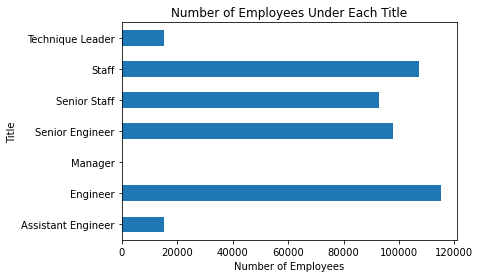

In [118]:
# 3e
employee_title.plot(kind = 'barh')
plt.title("Number of Employees Under Each Title")
plt.xlabel("Number of Employees")
plt.ylabel("Title")

In [119]:
# 3f - Join the employees and titles dataframes together.

emp_join_titles = pd.merge(employees, titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
emp_join_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [121]:
# 3g - Visualize how frequently employees change titles.

emp_join_titles = emp_join_titles.groupby('emp_no').title.count()
emp_join_titles

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

In [19]:
# 3h - For each title, find the hire date of the employee that was hired most recently with that title.

In [20]:
# 3i - Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [21]:
# Exercise 4 - Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [22]:
# 4a - What is the total price for each order?

In [23]:
# 4b - What are the most popular 3 items?

In [ ]:
# 4c - Which item has produced the most revenue?